In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#Case 1

In [2]:
!wget https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/forest_fires.csv?dl=0 -O forest_fires.csv

--2021-04-23 16:32:55--  https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/forest_fires.csv?dl=0
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 189 [text/plain]
Saving to: ‘forest_fires.csv’

forest_fires.csv    100%[===================>]     189  --.-KB/s    in 0s      

2021-04-23 16:32:55 (14.0 MB/s) - ‘forest_fires.csv’ saved [189/189]



In [3]:
df = pd.read_csv("forest_fires.csv")
df.head()

,Temperature,Humidity,Fires
0,22.8,40,No
1,29.6,27,Yes
2,17.8,51,No
3,19.3,38,No
4,28.6,27,Yes


In [4]:
df.isnull().sum()

Temperature    0
Humidity       0
Fires          0
dtype: int64

In [5]:
df.shape

(13, 3)

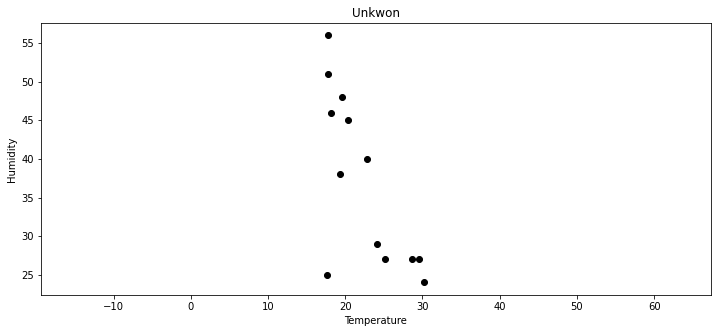

In [6]:
plt.figure(figsize=(12, 5))
plt.title("Unkwon")
plt.xlabel('Temperature')	
plt.ylabel('Humidity')
plt.axis("equal")

plt.scatter(df.Temperature, df.Humidity, c='k', label='no files');


==============================================

In [7]:
from sklearn.cluster import KMeans
import numpy as np

In [8]:
data = df[['Temperature', 'Humidity']]

- กำหนดจำนวนกลุ่มที่ต้องการจัดกลุ่มของข้อมูล แทนค่าด้วย K ในตัวแปร  *n_clusters*

In [9]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

print("Labels : ",  kmeans.labels_)
print("Center :", kmeans.cluster_centers_ )

Labels :  [2 0 1 2 0 1 0 1 0 0 1 0 2]
Center : [[25.88333333 26.5       ]
 [18.35       50.25      ]
 [20.8        41.        ]]


#แสดงผลกลุ่ม

In [10]:
# ฟังก์ชันหาระยะทาง
def get_distance(X, Y, pointX, pointY):
  distance = np.sqrt( (X  - pointX)**2 + (Y - pointY)**2 )
  return np.sort(distance)

In [11]:
group1 = df[kmeans.labels_ == 0]
group2 = df[kmeans.labels_ == 1]
group3 = df[kmeans.labels_ == 2]

In [12]:
cx1, cy1 = kmeans.cluster_centers_[0]
distance1 = get_distance(group1.Temperature, group1.Humidity, cx1, cy1)
radius1 = max(distance1)

cx2, cy2 = kmeans.cluster_centers_[1]
distance2 = get_distance(group2.Temperature, group2.Humidity, cx2, cy2)
radius2 = max(distance2)

cx3, cy3 = kmeans.cluster_centers_[2]
distance3 = get_distance(group3.Temperature, group3.Humidity, cx3, cy3)
radius3 = max(distance3)

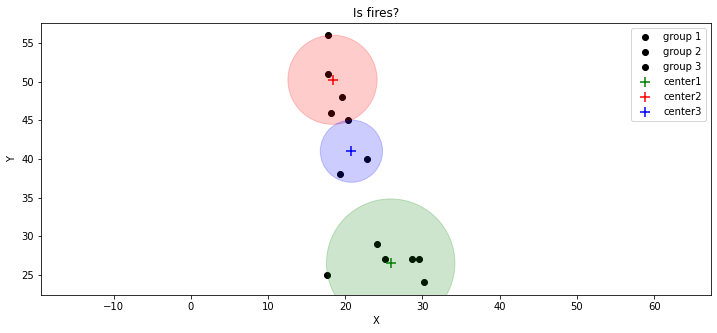

In [13]:
plt.figure(figsize=(12, 5))

plt.title("Is fires?")
plt.xlabel('X')	
plt.ylabel('Y')

plt.axis("equal")

circle1=plt.Circle((cx1, cy1), radius1, alpha=0.2, lw=1, color='g')
plt.gcf().gca().add_artist(circle1)

circle2=plt.Circle((cx2, cy2), radius2, alpha=0.2, lw=1, color='r')
plt.gcf().gca().add_artist(circle2)

circle3=plt.Circle((cx3, cy3), radius3, alpha=0.2, lw=1, color='b')
plt.gcf().gca().add_artist(circle3)


plt.scatter(group1.Temperature, group1.Humidity, c='k', label='group 1')
plt.scatter(group2.Temperature, group2.Humidity, c='k', label='group 2')
plt.scatter(group3.Temperature, group3.Humidity, c='k', label='group 3')

plt.scatter(cx1, cy1, s=100, c='g', marker='+', label='center1')
plt.scatter(cx2, cy2, s=100, c='r', marker='+', label='center2')
plt.scatter(cx3, cy3, s=100, c='b', marker='+', label='center3')

plt.legend(loc='upper right')
plt.show()

#พยากรณ์จุดใหม่

In [14]:
newpoint = [[14, 15], [22, 36], [25, 55]]
pred = kmeans.predict(newpoint)

print(pred)

[0 2 1]


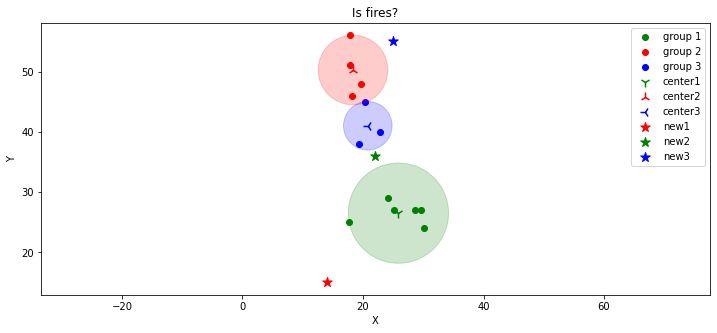

In [15]:
plt.figure(figsize=(12, 5))

plt.title("Is fires?")
plt.xlabel('X')	
plt.ylabel('Y')

plt.axis("equal")

circle1=plt.Circle((cx1, cy1), radius1, alpha=0.2, lw=1, color='g')
plt.gcf().gca().add_artist(circle1)

circle2=plt.Circle((cx2, cy2), radius2, alpha=0.2, lw=1, color='r')
plt.gcf().gca().add_artist(circle2)

circle3=plt.Circle((cx3, cy3), radius3, alpha=0.2, lw=1, color='b')
plt.gcf().gca().add_artist(circle3)


plt.scatter(group1.Temperature, group1.Humidity, c='g', label='group 1')
plt.scatter(group2.Temperature, group2.Humidity, c='r', label='group 2')
plt.scatter(group3.Temperature, group3.Humidity, c='b', label='group 3')

plt.scatter(cx1, cy1, s=100, c='g', marker='1', label='center1')
plt.scatter(cx2, cy2, s=100, c='r', marker='2', label='center2')
plt.scatter(cx3, cy3, s=100, c='b', marker='3', label='center3')

plt.scatter(newpoint[0][0],newpoint[0][1], s=100, c='r', marker='*', label='new1')
plt.scatter(newpoint[1][0],newpoint[1][1], s=100, c='g', marker='*', label='new2')
plt.scatter(newpoint[2][0],newpoint[2][1], s=100, c='b', marker='*', label='new3')

plt.legend(loc='upper right')
plt.show()

#Case 2

#หาจำนวนกลุ่มที่ดีที่สุด
ใช้ข้อมูลตัวอย่างใน sample_data (เหมือน regression)

In [16]:
df2 = pd.read_csv (r'/content/sample_data/california_housing_train.csv')

In [17]:
df2.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [18]:
dfk = df2[['longitude','latitude']]

dfk = dfk.iloc[0:100,]

dfk.shape

(100, 2)

In [19]:
dfk

,longitude,latitude
0,-114.31,34.19
1,-114.47,34.40
2,-114.56,33.69
3,-114.57,33.64
4,-114.57,33.57
...,...,...
95,-115.58,32.81
96,-115.58,32.81
97,-115.58,32.79
98,-115.58,32.78


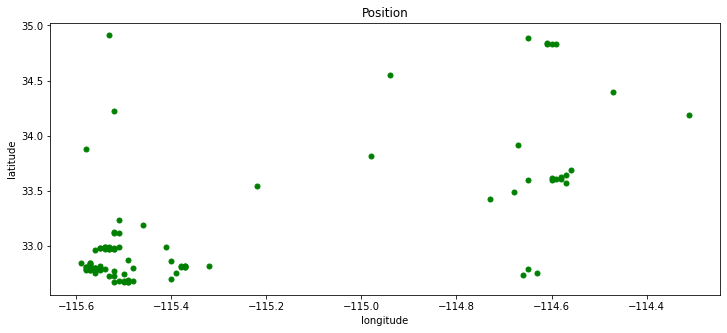

In [20]:
plt.figure(figsize=(12, 5))

plt.title("Position")
plt.xlabel('longitude')	
plt.ylabel('latitude')

plt.scatter(dfk['longitude'], dfk['latitude'], s=100, c='g', marker='.', label='center1')

plt.show()

In [21]:
distortions = []

K = range(1,5)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dfk)
    distortions.append(kmeanModel.inertia_)

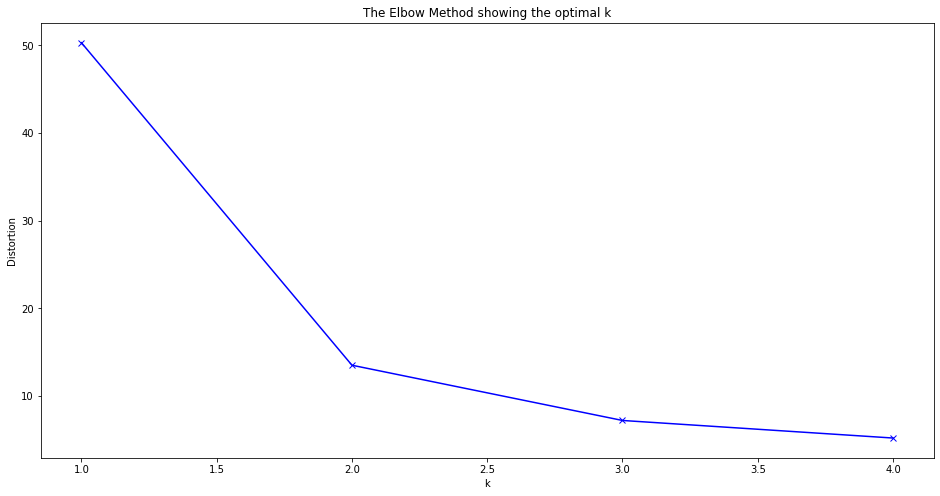

In [22]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

สมมติว่าพึงพอใจที่จำนวน 3 กลุ่ม

#เลือกจำนวนกลุ่มและสร้างโมเดล

In [23]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(dfk)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
print("Labels : ",  kmeanModel.labels_)
print("Center :", kmeanModel.cluster_centers_ )

Labels :  [1 1 2 2 2 2 2 1 2 1 2 2 1 1 2 1 2 2 2 2 2 2 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
Center : [[-115.51361111   32.84694444]
 [-114.783        34.649     ]
 [-114.72777778   33.49666667]]


In [25]:
dfk

,longitude,latitude
0,-114.31,34.19
1,-114.47,34.40
2,-114.56,33.69
3,-114.57,33.64
4,-114.57,33.57
...,...,...
95,-115.58,32.81
96,-115.58,32.81
97,-115.58,32.79
98,-115.58,32.78


In [26]:
group1 = dfk[kmeanModel.labels_ == 0]
group2 = dfk[kmeanModel.labels_ == 1]
group3 = dfk[kmeanModel.labels_ == 2]

cx1, cy1 = kmeanModel.cluster_centers_[0]
distance1 = get_distance(group1.longitude, group1.latitude, cx1, cy1)
radius1 = max(distance1)

cx2, cy2 = kmeanModel.cluster_centers_[1]
distance2 = get_distance(group2.longitude, group2.latitude, cx2, cy2)
radius2 = max(distance2)

cx3, cy3 = kmeanModel.cluster_centers_[2]
distance3 = get_distance(group3.longitude, group3.latitude, cx3, cy3)
radius3 = max(distance3)

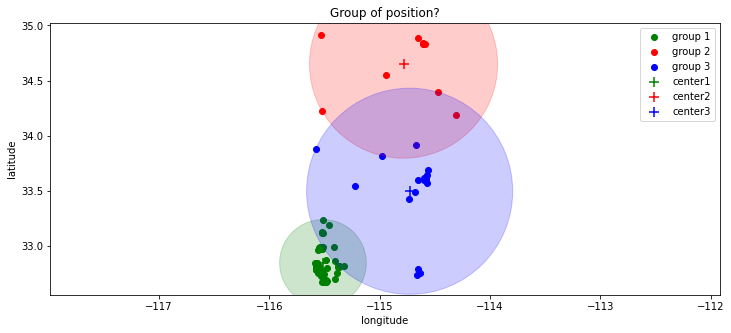

In [27]:
plt.figure(figsize=(12, 5))

plt.title("Group of position?")

plt.xlabel('longitude')	
plt.ylabel('latitude')

plt.axis("equal")

circle1=plt.Circle((cx1, cy1), radius1, alpha=0.2, lw=1, color='g')
plt.gcf().gca().add_artist(circle1)

circle2=plt.Circle((cx2, cy2), radius2, alpha=0.2, lw=1, color='r')
plt.gcf().gca().add_artist(circle2)

circle3=plt.Circle((cx3, cy3), radius3, alpha=0.2, lw=1, color='b')
plt.gcf().gca().add_artist(circle3)


plt.scatter(group1.longitude, group1.latitude, c='g', label='group 1')
plt.scatter(group2.longitude, group2.latitude, c='r', label='group 2')
plt.scatter(group3.longitude, group3.latitude, c='b', label='group 3')

plt.scatter(cx1, cy1, s=100, c='g', marker='+', label='center1')
plt.scatter(cx2, cy2, s=100, c='r', marker='+', label='center2')
plt.scatter(cx3, cy3, s=100, c='b', marker='+', label='center3')

plt.legend(loc='upper right')
plt.show()


- วงกลม แสดงรัศมี เท่านั้น
- สีจุด แสดงกลุ่ม

#LAB
- ใน Case 2
- ให้เพิ่มจำนวนตัวอย่าง dfk เป็น 500 รายการแรก
- ให้เพิ่มจำนวน K เป็น 10
- เลือกจำนวนกลุ่ม k ให้เหมาะสม
- แสดงการแบ่งกลุ่ม